In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

In [23]:
df_cleaned_drop_IF.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'aircraft_type', 'airline_number', 'airline_name',
       'flight_number', 'departure_time', 'arrival_time', 'duration', 'stops',
       'price', 'currency', 'co2_emissions', 'avg_co2_emission_for_this_route',
       'co2_percentage', 'scan_date'],
      dtype='object')

In [24]:
df_cleaned_drop_IF.head(3)

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,YYZ,Canada,ADD,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,multi,[Air Canada| Ethiopian],AC418|AC418|AC418,2022-05-02 16:00:00,2022-05-04 06:00:00,1860,2,820.0,USD,1089000.0,1126000.0,-3.0,2022-04-29 17:52:59
1,CAI,Egypt,NRT,Japan,Airbus A330|Airbus A320|Boeing 787,multi,[EgyptAir| Saudia| Etihad],MS663|MS663|MS663,2022-08-28 23:25:00,2022-08-30 13:00:00,1835,2,7754.0,USD,1091000.0,1203000.0,-9.0,2022-04-29 17:52:59
2,SYD,Australia,DEL,India,Boeing 737|Boeing 787,multi,[Qantas| Air India],QF445|QF445,2022-05-14 13:15:00,2022-05-15 16:55:00,1930,1,5225.0,USD,1152000.0,1202000.0,-4.0,2022-04-29 17:52:59


In [25]:
print(df_cleaned_drop_IF.head(1))

  from_airport_code from_country dest_airport_code dest_country  \
0               YYZ       Canada               ADD     Ethiopia   

                                      aircraft_type airline_number  \
0  Airbus A220-300 Passenger|Boeing 777|Airbus A350          multi   

              airline_name      flight_number       departure_time  \
0  [Air Canada| Ethiopian]  AC418|AC418|AC418  2022-05-02 16:00:00   

          arrival_time  duration  stops  price currency  co2_emissions  \
0  2022-05-04 06:00:00      1860      2  820.0      USD      1089000.0   

   avg_co2_emission_for_this_route  co2_percentage            scan_date  
0                        1126000.0            -3.0  2022-04-29 17:52:59  


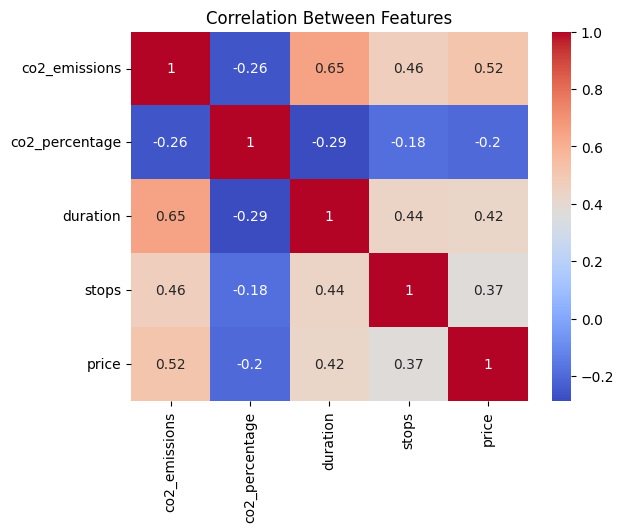

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_cleaned_drop_IF[['co2_emissions', 'co2_percentage', 'duration', 'stops', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


Centroids (scaled space):
 [[ 0.57848814  0.53991478  0.45658498  0.65957007  0.67843327 -0.30168149]
 [-0.72139099 -0.67328893 -0.56937433 -0.82250244 -0.84602539  0.37620531]]


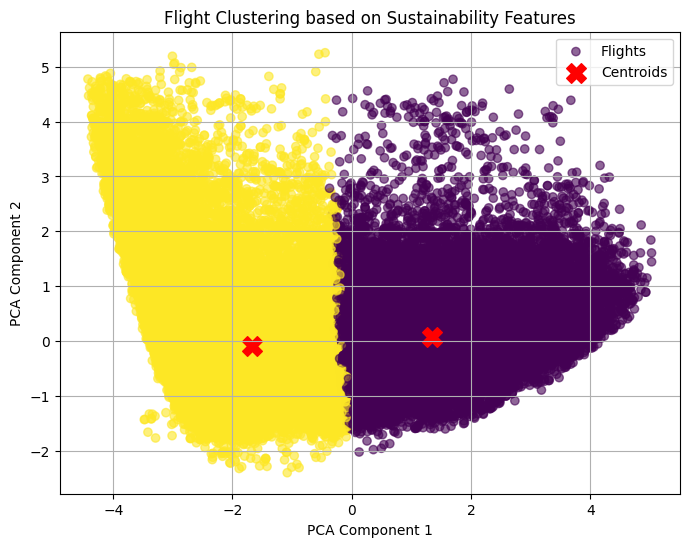

In [27]:
# Basic imports
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Prepare the data
# (Assume your dataframe is already loaded as df)

# Select important features
features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']
X = df_cleaned_drop_IF[features]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print("Scaled features:\n", X_scaled[:1])  # Print first 5 scaled features

# 3. Train K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Predict cluster labels
df_cleaned_drop_IF['cluster'] = kmeans.labels_

# 4. Print centroids
centroids = kmeans.cluster_centers_
print("Centroids (scaled space):\n", centroids)

# 5. Reduce dimensions for plotting (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Plot clusters
plt.figure(figsize=(8, 6))

# Plot the points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned_drop_IF['cluster'], cmap='viridis', label='Flights', alpha=0.6)

# Plot centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Flight Clustering based on Sustainability Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
df_cleaned_drop_IF['cluster'].value_counts()

cluster
0    55632
1    44363
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.32478951147451013
